<a href="https://colab.research.google.com/github/mukeshsharma1981/ML-Projects/blob/main/3_ML_Linear_Regression_PricePrediction_with_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/PricePrediction.csv')
pd.set_option('display.max_columns', None)
dataset.head()

,LotArea,YearBuilt,YearRemodelled,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,PoolArea,SalePrice
0,8450,2003,2003,856,Y,856,854,1710,1,0,2,1,3,1,8,0,2,548,Y,0,0,208500
1,9600,1976,1976,1262,Y,1262,0,1262,0,1,2,0,3,1,6,1,2,460,Y,298,0,181500
2,11250,2001,2002,920,Y,920,866,1786,1,0,2,1,3,1,6,1,2,608,Y,0,0,223500
3,9550,1915,1970,756,Y,961,756,1717,1,0,1,0,3,1,7,1,3,642,Y,0,0,140000
4,14260,2000,2000,1145,Y,1145,1053,2198,1,0,2,1,4,1,9,1,3,836,Y,192,0,250000


In [ ]:
print(dataset.shape)

(1460, 22)


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   LotArea         1460 non-null   int64 
 1   YearBuilt       1460 non-null   int64 
 2   YearRemodelled  1460 non-null   int64 
 3   TotalBsmtSF     1460 non-null   int64 
 4   CentralAir      1460 non-null   object
 5   1stFlrSF        1460 non-null   int64 
 6   2ndFlrSF        1460 non-null   int64 
 7   GrLivArea       1460 non-null   int64 
 8   BsmtFullBath    1460 non-null   int64 
 9   BsmtHalfBath    1460 non-null   int64 
 10  FullBath        1460 non-null   int64 
 11  HalfBath        1460 non-null   int64 
 12  BedroomAbvGr    1460 non-null   int64 
 13  KitchenAbvGr    1460 non-null   int64 
 14  TotRmsAbvGrd    1460 non-null   int64 
 15  Fireplaces      1460 non-null   int64 
 16  GarageCars      1460 non-null   int64 
 17  GarageArea      1460 non-null   int64 
 18  PavedDri

In [ ]:
print(dataset.describe())

             LotArea    YearBuilt  YearRemodelled  TotalBsmtSF     1stFlrSF  \
count    1460.000000  1460.000000     1460.000000  1460.000000  1460.000000   
mean    10516.828082  1971.267808     1984.865753  1057.429452  1162.626712   
std      9981.264932    30.202904       20.645407   438.705324   386.587738   
min      1300.000000  1872.000000     1950.000000     0.000000   334.000000   
25%      7553.500000  1954.000000     1967.000000   795.750000   882.000000   
50%      9478.500000  1973.000000     1994.000000   991.500000  1087.000000   
75%     11601.500000  2000.000000     2004.000000  1298.250000  1391.250000   
max    215245.000000  2010.000000     2010.000000  6110.000000  4692.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count  1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean    346.992466  1515.463699      0.425342      0.057534     1.565068   
std     436.528436   525.480383      0.518911      0.238753 

In [ ]:
## Function for converting categorical feature into numeric feature
def converter(column):
  if column=='Y' or column=='y':
    return 1
  else:
    return 0


In [ ]:
dataset['CentralAir'] = dataset['CentralAir'].apply(converter)
dataset['PavedDrive'] = dataset['PavedDrive'].apply(converter)

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LotArea         1460 non-null   int64
 1   YearBuilt       1460 non-null   int64
 2   YearRemodelled  1460 non-null   int64
 3   TotalBsmtSF     1460 non-null   int64
 4   CentralAir      1460 non-null   int64
 5   1stFlrSF        1460 non-null   int64
 6   2ndFlrSF        1460 non-null   int64
 7   GrLivArea       1460 non-null   int64
 8   BsmtFullBath    1460 non-null   int64
 9   BsmtHalfBath    1460 non-null   int64
 10  FullBath        1460 non-null   int64
 11  HalfBath        1460 non-null   int64
 12  BedroomAbvGr    1460 non-null   int64
 13  KitchenAbvGr    1460 non-null   int64
 14  TotRmsAbvGrd    1460 non-null   int64
 15  Fireplaces      1460 non-null   int64
 16  GarageCars      1460 non-null   int64
 17  GarageArea      1460 non-null   int64
 18  PavedDrive      1460 non-nul

In [ ]:
corrs = dataset.corr()
corrs

,LotArea,YearBuilt,YearRemodelled,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,PoolArea,SalePrice
LotArea,1.000000,0.014228,0.013788,0.260833,0.049755,0.299475,0.050986,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.010431,0.171698,0.077672,0.263843
YearBuilt,0.014228,1.000000,0.592855,0.391452,0.381831,0.281986,0.010308,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.537850,0.478954,0.433060,0.224880,0.004950,0.522897
YearRemodelled,0.013788,0.592855,1.000000,0.291066,0.298878,0.240379,0.140024,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.420622,0.371600,0.187277,0.205726,0.005829,0.507101
TotalBsmtSF,0.260833,0.391452,0.291066,1.000000,0.207958,0.819530,-0.174512,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.209124,0.232019,0.126053,0.613581
CentralAir,0.049755,0.381831,0.298878,0.207958,1.000000,0.146953,-0.011803,0.093666,0.114603,0.040325,0.109326,0.134637,0.007872,-0.246797,0.034509,0.186309,0.233726,0.230741,0.325482,0.145973,0.018122,0.251328
1stFlrSF,0.299475,0.281986,0.240379,0.819530,0.146953,1.000000,-0.202646,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.163848,0.235459,0.131525,0.605852
2ndFlrSF,0.050986,0.010308,0.140024,-0.174512,-0.011803,-0.202646,1.000000,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561,0.183926,0.138347,-0.040082,0.092165,0.081487,0.319334
GrLivArea,0.263116,0.199010,0.287389,0.454868,0.093666,0.566024,0.687501,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.467247,0.468997,0.080466,0.247433,0.170205,0.708624
BsmtFullBath,0.158155,0.187599,0.119470,0.307351,0.114603,0.244671,-0.169494,0.034836,1.000000,-0.147871,-0.064512,-0.030905,-0.150673,-0.041503,-0.053275,0.137928,0.131881,0.179189,0.120383,0.175315,0.067616,0.227122
BsmtHalfBath,0.048046,-0.038162,-0.012337,-0.000315,0.040325,0.001956,-0.023855,-0.018918,-0.147871,1.000000,-0.054536,-0.012340,0.046519,-0.037944,-0.023836,0.028976,-0.020891,-0.024536,0.030344,0.040161,0.020025,-0.016844


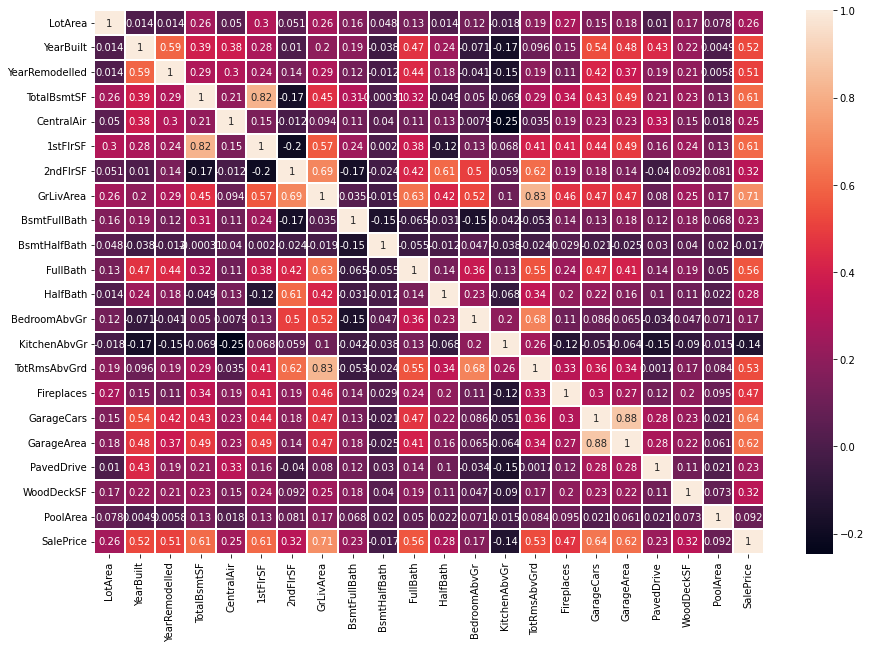

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(15,10))
map1=sns.heatmap(corrs, annot=True, linewidth=1)
map1

In [ ]:
## dividing our data into label and feature
X = dataset.drop(['TotRmsAbvGrd','GarageCars','SalePrice'], axis = 1)
Y = dataset['SalePrice']

In [ ]:
## We are putting all the features on the same scale (Z-Score) using standarscaler
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_Scaled = SS.fit_transform(X)
X_Scaled

array([[-0.20714171,  1.05099379,  0.87866809, ...,  0.2992528 ,
        -0.75217584, -0.06869175],
       [-0.09188637,  0.15673371, -0.42957697, ...,  0.2992528 ,
         1.62619479, -0.06869175],
       [ 0.07347998,  0.9847523 ,  0.83021457, ...,  0.2992528 ,
        -0.75217584, -0.06869175],
       ...,
       [-0.14781027, -1.00249232,  1.02402865, ...,  0.2992528 ,
        -0.75217584, -0.06869175],
       [-0.08016039, -0.70440562,  0.53949344, ...,  0.2992528 ,
         2.16891024, -0.06869175],
       [-0.05811155, -0.20759447, -0.96256569, ...,  0.2992528 ,
         5.12192075, -0.06869175]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split as tt

X_train, X_test, y_train, y_test = tt(X_Scaled,Y, test_size=0.30, random_state=3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1022, 19) (1022,)
(438, 19) (438,)


In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

score = reg.score(X_test,y_test)
score

0.5448183503092725

In [ ]:
error = mt.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(error)
rmse 

49367.89960261212

In [ ]:
mt.r2_score(y_test, y_pred)

0.5448183503092725

With Optimization Techniques like Cross Validation Scores / Ridge / Lasso and SGD (Schotastic Gradient Decent) approach

Cross Validation Scores

In [ ]:
from sklearn.model_selection import cross_val_score

reg1 = LinearRegression()

cv_results = cross_val_score(reg1, X_Scaled, Y, cv=5)
print(cv_results)

average_score = np.mean(cv_results)
average_score

[0.80167529 0.77612866 0.78956337 0.77066248 0.56850278]


0.7413065133795815

Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train, y_train)
lasso_predict = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.5448190289883033

GridSearchCV and SGD (Schotastic Gradient Decent) approach

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(random_state = 1)
grid_param = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000]}

gd_sr = GridSearchCV(estimator=sgdr, param_grid=grid_param, scoring='r2', cv=5)

gd_sr.fit(X_Scaled, Y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'eta0': 0.01, 'max_iter': 10000}


In [ ]:
sgdr = SGDRegressor(eta0=.01, max_iter=10000, penalty=None, random_state=1)
sgdr.fit(X_Scaled,Y)
print('Intercept', sgdr.intercept_)
print('score', sgdr.score(X_Scaled, Y))
print(pd.DataFrame(zip(X.columns, sgdr.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))


Intercept [180580.09877817]
score 0.7419250630030588
          Features  Coefficients
7        GrLivArea  18676.460214
6         2ndFlrSF  12905.923722
1        YearBuilt  12014.494460
5         1stFlrSF  10833.160116
15      GarageArea  10402.699294
2   YearRemodelled   9612.410963
3      TotalBsmtSF   9386.891346
14      Fireplaces   5895.350061
8     BsmtFullBath   4130.307621
10        FullBath   4019.389898
17      WoodDeckSF   2424.783455
9     BsmtHalfBath    696.734690
11        HalfBath     49.314542
0          LotArea   -427.444786
16      PavedDrive   -762.419255
4       CentralAir   -787.181238
18        PoolArea  -5928.158933
12    BedroomAbvGr  -6187.291898
13    KitchenAbvGr  -7489.884021


In [ ]:
sgdr.score(X_Scaled, Y)

0.7419250630030588